# Numerisk analyse i lab 3 — FY1001

Denne noteboken er ment for å gi dere et utgangspunkt for å gjøre de numeriske oppgavene i lab 3a og 3b. Den inneholder også enkelte forslag til hvordan dere burde gå frem til å løse oppgavene, men størsteparten av koden må dere skrive selv.

I tillegg inneholder også notebooken utdelt kode som dere skal bruke i lab 3b og i den tilhørende rapportskrivingen. Der vil dere også trenge funksjonaliteten dere utvikler i forbindelse med lab 3a, så det kan være hensiktsmessig å gjøre oppgavene i både 3a og i 3b i denne notebooken. 


Den numeriske analysen tilhørende lab 3a og 3b (samt tilhørende rapport) kan deles inn i fire deler.

1. **Innhenting av data:** Analyse av eksperimentelle resultater forutsetter at man klarer å lese inn resultatene i et passende format.
2. **Fremstilling av resultater:** Dette gjelder både eksperimentelle og numeriske resultater. Denne notebooken vil gi en kort innføring i grafisk fremstilling, samt referanser til nyttige nettsider der dere kan lære mer.
3. **Enkel løsning av enkle differensialligninger:** Dere vil lære (mye) mer om numeriske metoder resten av studieløpet (i fag som "Bølgefysikk og Fluidmekanikk" (TFY4163) og "Introduksjon til Vitenskapelige Beregninger" (TMA4320)), men i lab 3a skal dere bruke den enkleste numeriske metoden til å løse differensialligninger. Ligningen dere skal løse er gitt i ligning (1.14). 
4. **Sammenligne numeriske løsninger med eksperimentelle resultater og bruke dette til å uthente relevant informasjon om fysikken i systemet:** Dette er den viktigste delen av lab 3b og i rapporten. Her vil dere bruke en utdelt numerisk løser til å løse en mer komplisert differensialligning. Se lengre nede i denne notebooken, samt prosjektbeskrivelsen for mer informasjon.


De første tre punktene er også forklart i de to numeriske øvingene i faget så det kan være hensiktsmessig å titte på dem om dere står fast. 

# Lab 3a


La oss starte med å importere nødvendige bibliotek. Hvis dere har åpnet Jupyter Notebooken via Anaconda burde ikke dette være noe problem, men hvis dere ikke klarer å kjøre cellen nedenfor, ta kontakt med labveileder eller spør en medstudent.

In [183]:
import matplotlib.pyplot as plt
import numpy as np

### Oppgave 1

Siden dere kommer til å trenge verdien til $\omega_0$ senere, er det hensiktsmessig å gjøre oppgave 1 først. Gjør den i cellen nedenfor.

In [184]:
# Beregn omega_0 ut fra de fysiske størrelsene i oppgaveteksten.
def calc_omega_0():
    R = 0.53 # m
    r = 0.03 # m
    c = (1/2)
    l = (R - r)
    g = 9.81
    
    omega = np.sqrt(g/(l*(1+c)))
    
    return omega

def T_0():
    omega = calc_omega_0()
    T = (2*np.pi)/omega
    
    return T

### Oppgave 2

For å plotte den analytiske løsningen for $\phi(t)$ må dere lage en funksjon som returnerer verdien til $\phi(t)$ i henhold til ligning (1.18) i prosjekbeskrivelsen. En mulig form på denne funksjonen kan være:

In [185]:
def dempet_harmonisk_svigning(t, phi_0, omega_0, delta):
    omega_d = np.sqrt(omega_0 ** 2 - delta ** 2)
    phi = phi_0 * np.e**(-delta*t) * np.cos(omega_d*t)
    return phi

Ovenfor legger dere kanskje merke til at vi brukte `numpy`-biblioteket til å regne ut kvadratroten i $\omega_D$. Dette er et av de nyttigste Python-bibliotekene, så vi anbefaler at dere prøver å bruke det mest mulig til matematiske operajoner.

Før dere skal plotte resultatene deres selv, la oss se på noen eksempler som viser hvordan vitenskapelige plott (ikke) skal se ut. La oss bruke en harmonisk pendel med analytisk løsning $\phi(t) = \phi_0 \cos(\omega_0 t)$ som eksempel, hvor vi for enkelhets skyld har valgt $\omega_0=1$ $\mathrm{s}^{-1}$. Vi ønsker å se på tidsintervallet $t \in [0,10]$ s. For å generere en liste (eller mer presist, et "array") med $M$ jevnt fordelte punkter bruker vi `np.linspace`:

In [186]:
M = 100
t_array = np.linspace(start=0, stop=10, num=M)

phi_0 = 0.1 # Vi velger en liten startvinkel
harmonisk_phi_som_funksjon_av_t = phi_0 * np.cos(t_array)

`numpy` er et et svært smidig bibiliotek. Ovenfor forstår den at når cosinusfunksjonen tar inn en liste, så skal den returnere cosinus av hvert element i den listen. Deretter skjønner den at når vi tar et tall ($\phi_0$) og multipliserer det med en liste, så skal alle elementene i listen multipliseres med samme tall. Merk at dette fungerer på samme måte med egendefinerte funksjoner (som for eksempel  `dempet_harmonisk_svigning`), gitt at funksjonen kun bruker andre `numpy`-funksjoner. 

La oss plotte resultatet:

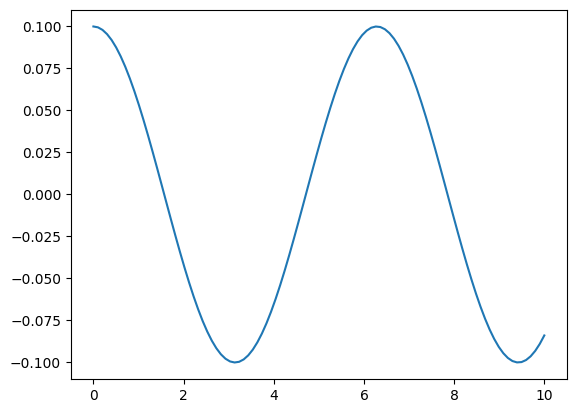

In [187]:
plt.plot(t_array, harmonisk_phi_som_funksjon_av_t)
plt.show()

Dette er verken et pent eller særlig informativt plott. Kodeblokken under viser syntaksen for å gjøre det som kreves for å få et lesbart plott og setter på relevante aksetitler (med enheter). Se labheftet for mer informasjon om grafiske fremstillinger. 

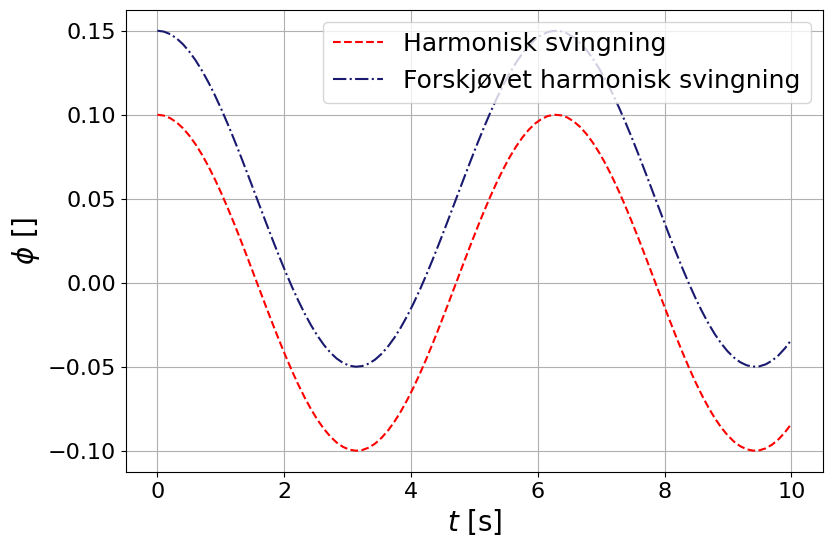

In [188]:
plt.figure(figsize=(9,6)) # Angir figurstørrelsen (bredde x høyde) i tommer

# Setter fargen til r=red, og endrer til stiplede linjer, label-nøkkelordet gir det man plotter et navn
plt.plot(t_array, harmonisk_phi_som_funksjon_av_t, color="r", linestyle="--", label="Harmonisk svingning")

# For å vise at vi kan ha flere grafer i samme figur, la oss plotte samme graf som tidligere, men alle phi-verdiene
# forskjøvet fra 0. Vi bruker en litt mer fancy farge og linjestil.
plt.plot(t_array, harmonisk_phi_som_funksjon_av_t + 0.05, color="midnightblue", linestyle="-.", 
         label="Forskjøvet harmonisk svingning")


plt.xlabel("$t$ [s]", fontsize=20) # Dollartegn rundt $t$ viser Python at det skal være mattefont, [s] angir at 
# enheten er sekund
plt.ylabel("$\phi$ []", fontsize=20) # [] angir at \phi ikke har enhet

# Øker skriftstørrelsen på tallverdiene på x- og y-aksen
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18) # Gjør at navnet på alle navngitte plott vises i figuren
plt.grid() # Legger på et rutenett

# Den mest hensiktsmessige måten å lagre plot er ofte å gjøre det direkte i Python
# Nøkkelordet bbox_inches="tight" gjør at man kun lagrer plottet, ikke margene rundt
# Fjern # på linjen under for å lagre plottet
# plt.savefig("mitt_forste_plott.pdf", bbox_inches="tight") 

plt.show()

Dere kommer til å plotte ___mye___ i løpet av studiet, så vi anbefaler at dere blir kjent med de forskjellige kommandoene og varierer farge, linjestil osv. Internett har stort sett svar på alle spørsmål, så dersom dere ønsker å endre på noe, Google i vei, så finner dere helt sikkert svar. Fysikknettsiden [NumFys](https://www.numfys.net/) har også korte plotte-notebooks, som for eksempel [denne](https://nbviewer.org/urls/www.numfys.net/media/notebooks/intermediate_plotting_final.ipynb), der dere kan lære mer.

Eksempelet ovenfor dekker alle formelle krav til grafiske fremstillinger i dette faget, så dere trenger ikke gjøre det mer komplisert hvis dere ikke ønsker, men ikke bruk akkurat samme farger og linjestil i rapporten deres.


Nå har dere alle forutsetninger for å løse oppgave 2. Velg et annet tidsintervall og startvinkel enn det vi gjorde her. 

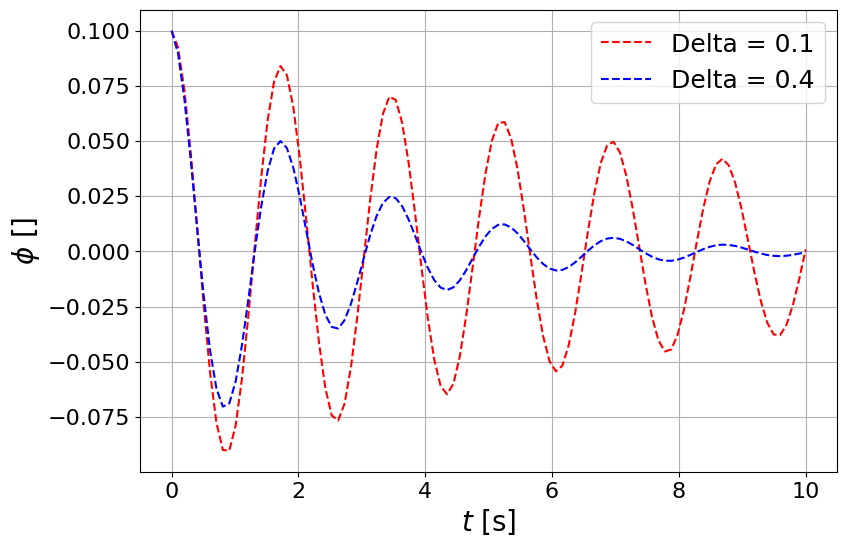

In [189]:
# Oppgave 2
omega_0 = calc_omega_0()
delta = 0.1
phi_0 = 0.1

M = 100
t_list = np.linspace(0, 10, M)
y_list = [
    dempet_harmonisk_svigning(t, phi_0, omega_0, delta)
    for t in t_list
]

delta = 0.4
y2_list = [
    dempet_harmonisk_svigning(t, phi_0, omega_0, delta)
    for t in t_list
]

plt.figure(figsize=(9,6)) 
plt.plot(t_list, y_list, color="r", linestyle="--", label="Delta = 0.1")
plt.plot(t_list, y2_list, color="b", linestyle="--", label="Delta = 0.4")

plt.xlabel("$t$ [s]", fontsize=20) 
plt.ylabel("$\phi$ []", fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18) 
plt.grid() 

plt.show()

### Oppgave 3 - Eulers metode

På sitt mest grunnleggende, trenger man kun tre funksjoner for å løse en andreordens ODE numerisk.


1. En funksjon $f$ som beskriver ligningen for $\ddot{\phi}$. $f$ avhenger av $\phi$ og $\dot{\phi}$, og kan også avhenge av $t$ selv om den ikke gjør det for differensialligningen vi studerer her. Definisjonen av $f$ blir da $f(\phi, \dot{\phi}) = \ddot{\phi}$. For diffligningen dere skal løse er $f$ gitt i ligning (1.20). Merk at i tillegg til $\phi$ og $\dot{\phi}$ må Python-funksjonen ta inn $\omega_0$ og $\delta$ siden disse fysiske størrelsene inngår i $f$. En mulig form på $f$ kan være:

In [190]:
def f(phi, phi_dot, w0, delta):
    phi_double_dot = -w0**2 * np.sin(phi) - 2*delta*phi_dot
    return phi_double_dot

2. En stegfunksjon som relaterer $\phi$ og $\dot{\phi}$ ved tidspunkt $t +\Delta t$ til $\phi$ og $\dot{\phi}$ ved tidspunkt $t$. Dette svarer til ligning (1.14) i prosjektbeskrivelsen og beskriver stegfunksjonen i Eulers metode. Bruk $f$ som dere fant i forrige punkt.

In [191]:
def step_Euler(phi, phi_dot, dt, w0, delta=0.):
    # Fyll in deres egen kode her som finner variablene next_phi og next_phi_dot
    next_phi = phi + phi_dot*dt
    next_phi_dot = phi_dot + (-w0**2 * np.sin(phi) - 2*delta*phi_dot) *dt
    return next_phi, next_phi_dot

3. En overordnet funksjon som gradvis beregner tidstuviklingen til $\phi$ og $\dot{\phi}$ fra et tidspunkt $t_0$ til $t_{\text{f}}$, der den numeriske steglengden er $\Delta t$. Her må vi ta inn flere argumenter (som for eksempel initialverdiene til $\phi$ og $\dot{\phi}$). Funksjonen bør returnere arrays som inneholder verdiene av $\phi$ og $\dot{\phi}$ ved tidspunktene $t = 0, \Delta t, 2 \Delta t, ..., N\Delta t$, samt et array som inneholder tidspunktene. En mulig funksjonsdeklarasjon kan se slik ut:

In [192]:
def ODE_solver(dt, t_0, t_end, phi_0, phi_dot_0, w0, delta=0., step_func=step_Euler):
    # Fyll in deres egen kode her som lager en array med tidspunkter, t_array, samt arrays med verdiene
    # for phi og phi_dot evaulert ved tidspunktene i t_array
    t_num_array = np.arange(t_0, t_end, dt)
    phi_num_array = [phi_0]
    phi_dot_num_array = [phi_dot_0]
    for i in range(len(t_num_array) - 1):
        phi, phi_dot = step_func(phi_num_array[i], phi_dot_num_array[i], dt, w0, delta)
        phi_num_array.append(phi)
        phi_dot_num_array.append(phi_dot)
        
    return t_num_array, phi_num_array, phi_dot_num_array

I funksjonen ovenfor har vi med stegfunksjonen som et valgfritt argument. Vi gjør dette for å tydeliggjøre at mange numeriske løsere av diffligninger virker likt, men har forskjellige stegfunksjoner. I den utdelte koden (inkludert lengre nede i notebooken) har vi implementert en mer sofistikert stegfunksjon som heter `stepCN` som dere skal bruke i lab 3b. Den inneholder også flere dempingsledd enn det vi trenger å ta hensyn til i lab 3a, og den tar derfor inn noen ekstra argumenter. Det viktige her er at `ODE_solver` virker på akkurat samme måte uansett hvilken stegfunksjon vi tar inn.


Når dere har implementert de tre funksjonene ovenfor er dere klare til å beregne $\phi(t)$ numerisk og gjøre oppgave 3. Gjør det nedenfor:

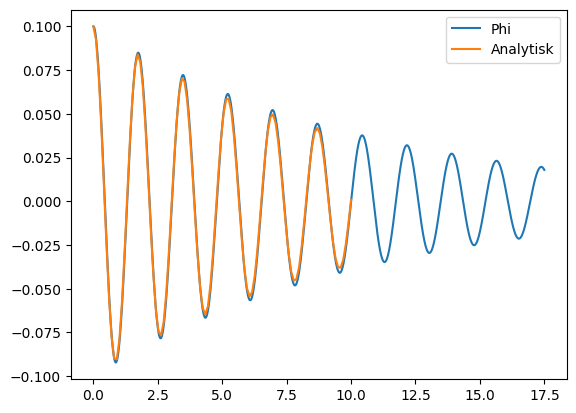

In [193]:
#Oppgave 3
dt = 0.001
t_0 = 0
t_end = 17.5
phi_0 = 0.1
phi_dot_0 = 0
w0 = calc_omega_0()

t_array, phi_num_array, phi_dot_num_array = ODE_solver(dt, t_0, t_end, phi_0, phi_dot_0, w0, delta=0.1)


plt.plot(t_array, phi_num_array, label="Phi")
plt.plot(t_list, y_list, label="Analytisk")
plt.legend()
plt.show()

### Oppgave 4 - Innlesning av data
I både lab 1 og 3b har dere rådata i det foretrukne formatet til Tracker, og i lab 3a har dere fått utdelt data i samme format. Nå skal lese disse dataene inn i Python på en hensiktsmessig måte. Numerisk øving 1 dekker dette delvis, men her er par tips:
- Pass på at filen med rådata ligger i samme mappe som notebooken. Hvis dere har kontroll på hvordan filsystemet til PC-en deres fungerer er dette strengt tatt ikke nødvendig, men det er en sikker måte på at Python finner rådatafilen.
- Det er mange måter å lese inn data til Python. Den enkleste måten er å bruke funksjonen `np.loadtxt("navnet_ditt_paa_filen.txt")` slik dere gjorde i Lab 2. Dette forutsetter at tekstfilen deres er på riktig format. Her er tre konkrete formatkrav til tekstfilen:
1. Alle rader inneholder kun tall, ikke tekst. Dette er spesielt relevant i de øverste to linjene i rådatafilen fra Tracker.
2. Tallene bruker punktum som desimaltegn, ikke komma. Bruk "Søk og erstatt"-funksjonen i et skriveprogram for å endre dette.
3. Tracker bruker vanligvis et minustegn som Python ikke forstår hva er (Tracker bruker et ekstra langt minustegn, "--", mens Python og andre programmeringsspråk bruker "-"). Bruk "Søk og erstatt"-funksjonen i et skriveprogram for å endre dette.
- Les les alle rådataene inn i en variabel (som vi kaller `raadata`) med kommandoen `raadata = np.loadtxt("navnet_ditt_paa_filen.txt")`. Deretter, bruk vanlig syntaks for listeindeksering til å hente ut de første to kolonnene i `raadata` til nye variabler som heter `t_array` og `x_array`.

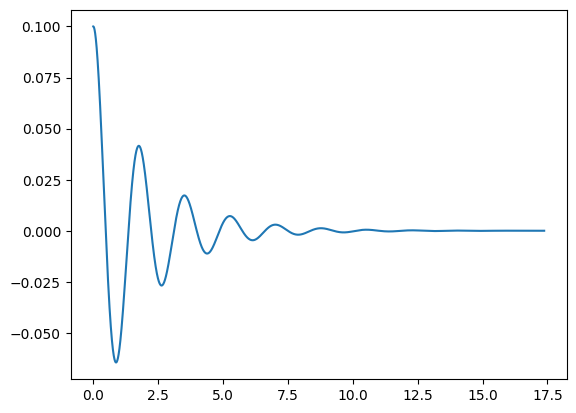

In [194]:
# Skriv kode dere dere leser inn data fra TestData1.txt til forskjellige variabler, t_array, x_array etc.
raadata = np.loadtxt("test_data_1.txt", delimiter=";")
t_array, x_array = raadata[:,0], raadata[:,1]


R = 0.53
r = 0.03
l = (R - r)
phi_array = [
    np.arcsin(x/l)
    for x in x_array
]

# Konverter deretter x_array til phi_array og plott resultatet.
plt.plot(t_array, phi_array)
plt.show()

### Oppgave 4 - Sammenligning med data

Dere kan nå sammenligne `TestData1.txt` med $\phi(t)$ som dere beregner numerisk med forskjellige verdier for $\delta$. Gjør dette nedenfor. Start med verdien $\delta =0.1$ $\mathrm{s}^{-1}$, og forsøk å finne verdien for $\delta$ som gir best samsvar mellom de utdelte og de numeriske verdiene for $\phi(t)$. Hvor godt samsvar finner dere og hva er anslaget deres for $\delta$?

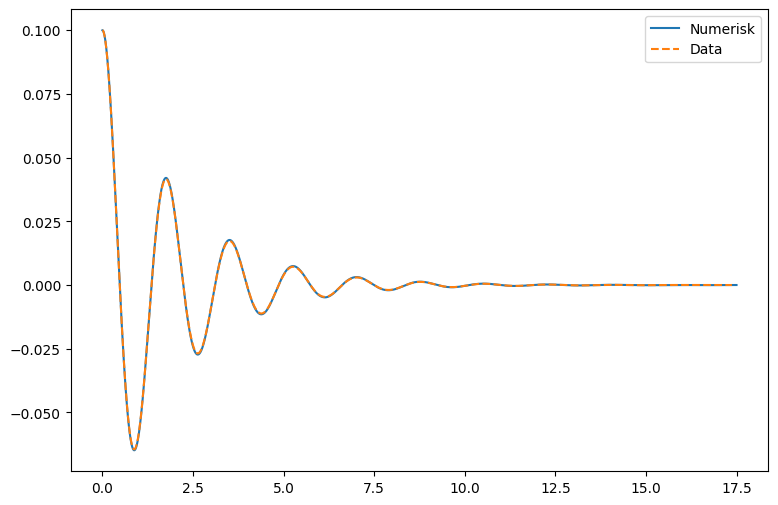

In [195]:
#Analyse av TestData1.txt
t_list, phi_list, phi_dot_num_array = ODE_solver(dt, t_0, t_end, phi_0, phi_dot_0, w0, delta=0.5)
plt.figure(figsize=(9,6))
plt.plot(t_list, phi_list, label="Numerisk")
plt.plot(t_array, phi_array, "--", label="Data")
plt.legend()
plt.show()

Gjenta prosessen med `TestData2.txt`. Hvor godt klarer dere nå å få dataene til å samsvare?

In [196]:
#Analyse av TestData2.txt
raadata = np.loadtxt("test_data_2.txt", delimiter=";")
t_array, x_array = raadata[:,0], raadata[:,1]


R = 0.53
r = 0.03
l = (R - r)
phi_array = [
    np.arcsin(x/l)
    for x in x_array
]

delta_list = [
    n
    for n in range(0.3, 0.32, 0.001)
]

t_list, phi_list, phi_dot_num_array = ODE_solver(dt, t_0, t_end, phi_0, phi_dot_0, w0, delta=0.31)
plt.figure(figsize=(9,6))
plt.plot(t_list, phi_list, label="Numerisk")
plt.plot(t_array, phi_array, "--", label="Data")
plt.legend()
plt.show()


TypeError: 'float' object cannot be interpreted as an integer

Hvis dere har gjennomført oppgave 1-4 i løpet av lab 3a, godt jobbet! Husk å lagre notebooken så fremgangen deres ikke er forgjeves. Nå kan dere starte å utforske hvordan løseren i lab 3b virker. Her er det nok sannsynligvis også lurt å skumlese den tilhørende prosjektbeskrivelsen. 

# Lab 3b

I denne delen av den numeriske analysen skal dere jobbe mer selvstendig, og dere må strukturere hvordan dere vil gå frem selv. Fra koden dere skrev i lab 3a, er spesielt delen om plotting og datainnlesning relevant. Implementasjonen av Eulers metode er ikke like relevant, siden dere nedenfor får utdelt kode som implementerer Crank-Nicolson-metoden. Denne løseren er mer stabil og raskere, og den løser den fullstendige diffligningen i ligning (2.11) som inneholder alle dempingsmekanismene i systemet, ikke bare $\delta$ som i lab 3a. 

Før dere gir dere i kast med oppgave 2b kan det være lurt å starte med oppgave 2a, for å sjekke at de eksperimentelle målingene deres ser fine ut.


In [170]:
# Oppgave 2a)


Nedenfor ligger koden for stegfunksjonen til Crank-Nicholson-metoden. Den gjennomfører ett tidssteg av den fullstendige diffligningen som er beskrevet i ligning (2.11). I tillegg har vi utdelt funksjonen `ODE_solver_lab_3b` som fungerer likt som funksjonen `ODE_solver` fra tidligere, men som i stedet bruker CN-metoden. Siden den beskriver alle tre dempingsmekanismene, tar den inn tre dempingsparametre: $\beta$, $\delta$, og $\phi_R$.

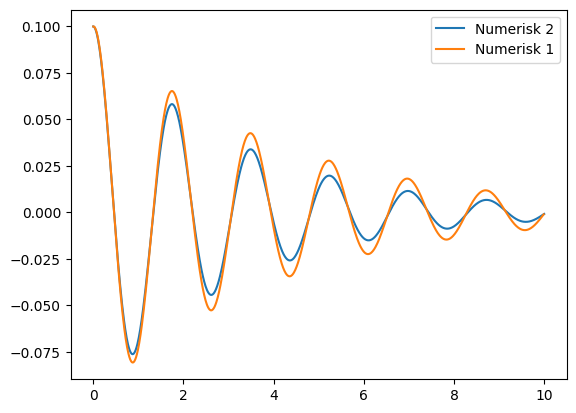

<Figure size 900x600 with 0 Axes>

In [205]:
''' 
NB! Denne kodeblokken inneholder kode dere trenger for å kjøre Crank-Nicholson-metoden.
Det er ikke forventet at dere skal sette dere inn i hva som skjer i denne koden, men dere må klare å bruke den.
'''
def derivative(x, w0, gamma, phiR, delta, beta):
    return np.array([x[1], -w0**2*np.sin(x[0])-(phiR*np.pi/(2*w0))*np.sign(x[1])*(w0**2*np.cos(x[0])+gamma*x[1]**2)-
                  2*delta*x[1]-beta*(3*np.pi/(4*w0))*x[1]**2*np.sign(x[1])])


def findInvJac(x, w0, gamma, phiR, delta, beta, dt):
    f00 = 1
    f01 = -(dt/2)
    f10 = -(dt/2)*(-w0**2*np.cos(x[0])+(phiR*np.pi/(2*w0))*np.sign(x[1])*w0**2*np.sin(x[0]))
    f11 = 1-(dt/2)*(-(phiR*np.pi/(2*w0))*np.sign(x[1])*2*gamma*x[1]-2*delta-2*beta*(3*np.pi/(4*w0))*np.absolute(x[1]) )
    return (1/(f00*f11-f01*f10))*np.array([[f11, -f01], [-f10, f00]])

def findf(x, xPrev, w0, gamma, phiR, delta, beta, dt):
    return x-xPrev-(dt/2)*(derivative(x, w0, gamma, phiR, delta, beta)+derivative(xPrev, w0, gamma, phiR, delta, beta))

def NewtonMethod(x, xPrev, w0, gamma, phiR,delta, beta, dt):
    return x-np.matmul(findInvJac(x, w0, gamma, phiR, delta, beta, dt), findf(x, xPrev, w0, gamma, phiR, delta, beta, dt))

def careFullStep(xPrev, w0, gamma, phiR, delta, beta, dt, n):
    nIntervalls = n
    dt = dt/nIntervalls

    k = np.empty((4, 2))
    x = np.empty((2, 2))
    x[0] = np.copy(xPrev)
    for i in range(nIntervalls):
        k[0] = derivative(x[0], w0, gamma, phiR, delta, beta)
        x[1] = x[0]+(dt/2)*k[0]
        k[1] = derivative(x[1], w0, gamma, phiR, delta, beta)
        x[1] = x[0]+(dt/2)*k[1]
        k[2] = derivative(x[1], w0, gamma, phiR, delta, beta)
        x[1] = x[0]+dt*k[2]
        k[3] = derivative(x[1], w0, gamma, phiR, delta, beta)
        x[0] += (dt/6)*(k[0]+2*k[1]+2*k[2]+k[3])
    return x[0]

def stepCN(phi, phidot, dt, w0, gamma=1., phiR=0., delta=0., beta=.0):
    """
    :param phi: float
        The previous value of phi
    :param phidot: float
        The previous value of phidot
    :param dt: float
        Fixed step size
    :param w0: float
        Undamped resonance-frequency of the harmonic oscillator
    :param gamma: float
        Factor incorporating the geometry of the oscillating object, defaults to 1
    :param phiR: float
        Zeroth order in phidot damping strength, defaults to 0
    :param delta: float
        First order in phidot damping strength, defaults to 0
    :param beta: float
        Second order in phidot damping strength, defaults to 0        
    :return x[0]: float
        The next value of phi after dt time has passed
    :return x[1]: float
        The next value of phidot after dt time has passed
    :return counter: int
        NB! This variable is commented out, but can be reintroduced if you need help debugging your code.
        The number of iterations of Newtons method. If counter=-1 the derivative is non-continuous on the interval 
        or if counter=-2 The Newtons-method is non-converging, and several iterations of a fourth-order RK4 has 
        been employed instead        
    """
    xPrev = np.array([phi, phidot])
    x = xPrev+dt*derivative(xPrev, w0, gamma, phiR, delta, beta)
    counter = 0
    tol=1e-15 # Tolerance of Newtons method, default value 1e-15
    while np.amax(np.absolute((findf(x, xPrev, w0, gamma, phiR, delta, beta, dt)))) > tol or counter < 1:
        if (np.sign(x[1] * xPrev[1]) == -1) and counter > 2 :
            return careFullStep(xPrev, w0, gamma, phiR, delta, beta, dt, 10)   #, -1
        x = NewtonMethod(x, xPrev, w0, gamma, phiR, delta, beta, dt)
        counter += 1
        if counter >= 10:
            return careFullStep(xPrev, w0, gamma, phiR, delta, beta, dt, 100)   #, -2
    return x[0], x[1]   #, counter

def ODE_solver_lab_3b(dt, t_0, t_end, phi_0, phi_dot_0, w0, gamma=1., phiR=0., delta=0., beta=0., step_func=stepCN):
    number_steps = int((t_end - t_0)/dt) + 1 
    t_num_array = np.linspace(t_0, t_end, number_steps)
    dt = t_num_array[1] - t_num_array[0]
    phi_num_array = np.zeros(number_steps)
    phi_num_array[0] = phi_0
    phi_dot_num_array = np.zeros(number_steps)
    phi_dot_num_array[0] = phi_dot_0
    
    for i in range(0, number_steps - 1):
        phi_num_array[i+1], phi_dot_num_array[i+1] = step_func(phi_num_array[i], phi_dot_num_array[i], dt,
                                                                      w0, gamma, phiR, delta, beta)
    return t_num_array, phi_num_array, phi_dot_num_array

## Noen tips om kurvetilpasning
Med en mer stabil, rask, differensialligningsløser, kan dere utforske de forskjellige dempingsmekanismene nærmere. Ved å simulere bevegelsen til sylinderen for forskjellige verdier av $\delta, \beta$ og $\phi_R$ kan man se hvor godt numeriske resultater samsvarer med eksperimentelle målinger. Dette er i stor grad dere gjorde i oppgave 4 i lab 3a da dere anslo $\delta$, bare med flere dempingsparametre på en gang. 

Dere står fritt til å velge selv hvordan dere vil gå frem her. Det enkleste er sannsynligvis å eksperimentere litt med forskjellige størrelsesordner for de forskjellige parameterene en og en, slik at dere har et røft anslag på hvor store de må være for å gi en realistisk demping. Etterpå, finn verdier for $\delta, \beta$, og $\phi_R$ som gjør at de numeriske resultatene samsvarer best mulig med de eksperimentelle verdiene. For å evalulere samsvaret, plott de numeriske resultatene i samme figur som de eksperimentelle verdiene og observer i hvor stor grad grafene overlapper. 




In [172]:
# Resterende numerisk analyse
